# 1. matplotlib 기초

### 기초 환경 설정

- pyplot.rcParams['font.family']: 폰트 설정(특히, 한글을 쓰는 경우에 반드시 설정 필요)
- pyplot.rcParams['font.size']: 글씨 크기 설정
- pyplot.rcParams['figure.figsize']: 그래프 크기 설정


- %matplotlib inline: 셀에 그래프 출력
- plt.savefig(file, dpi): 그래프 저장


- plt.xlabel(label): xlabel설정, fontproperties, fontsize, fontstyle 설정
- plt.ylabel(label): ylabel설정, fontproperties, fontsize, fontstyle 설정
- plt.title(label, loc): title설정, loc: 위치(center, left, right)


### 그래프 눈금 설정

- plt.xticks(ticks, labels): ticks(위치)에 labels를 입력(x축)
- plt.yticks(ticks, labels): ticks(위치)에 labels를 입력(y축)


### 범례 설정

- plt.legend(loc): loc: 범례 위치(upper right: 1, upper left: 2, lower left: 3, lower right: 4, right: 5, center: 10)
- 범례를 표시하려면 그래프를 그릴 때 label 키워드를 사용하여 범례를 정의해야 함


### 축 범위 설정

- plt.xlim(left, right): x축의 범위를 (left, right)로 설정
- plt.ylim(bottom, top): y축의 범위를 (bottom, top)로 설정

### dataframe.plot()

- dataframe을 사용하여 그래프를 그릴 수 있음
- kind: 그래프 종류(line: 선 그래프, scatter: 산점도, bar: 막대 그래프, pie: 파이 차트)
- x: x축에 들어갈 칼럼명(입력하지 않으면 index가 x축에 들어감) / 파이 차트일 경우: 각 파이의 크기
- y: y축에 들어갈 칼럼명 / 파이 차트일 경우: 각 파이에 부착되는 라벨
- xticks, yticks 등도 설정 가능(단, pyplot을 사용해서도 설정 가능)

# 2. 꺾은선 그래프

- pyplot.plot
- x, y: x, y 축에 들어갈 값(길이가 같아야 함)
- linewidth: 선 두께
- marker: 마커 종류
- markersize: 마커 크기
- color: 선 색상
- linestyle: 선 스타일
- label: 범례

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (30, 10)

In [2]:
df = pd.read_csv('데이터/2019년_시간대별_상품판매량.csv', encoding = 'cp949')
df.head()

,날짜,상품1,상품2,상품3
0,2019-01-01,48,48,50
1,2019-01-02,48,44,49
2,2019-01-03,48,54,50
3,2019-01-04,53,42,48
4,2019-01-05,46,42,50


#### pyplot을 이용한 그래프

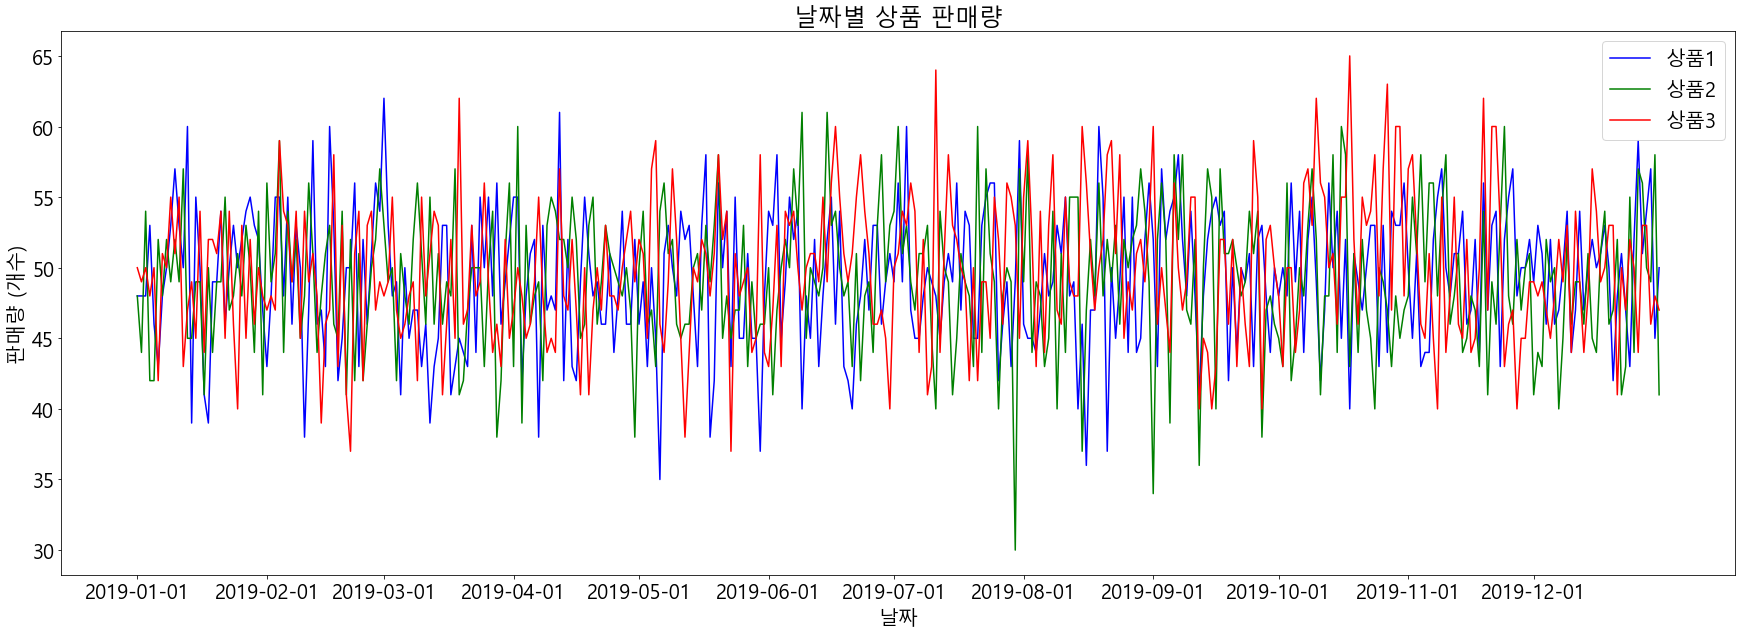

In [3]:
plt.title('날짜별 상품 판매량')
plt.xlabel('날짜')
plt.ylabel('판매량 (개수)')

xtick_range = np.cumsum([0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30])     # 월별 일수 누적
plt.xticks(xtick_range, df['날짜'].loc[xtick_range])

plt.plot(df['날짜'], df['상품1'], label = '상품1', color = 'b')
plt.plot(df['날짜'], df['상품2'], label = '상품2', color = 'g')
plt.plot(df['날짜'], df['상품3'], label = '상품3', color = 'r')

plt.legend()

#### dataframe을 이용한 그래프

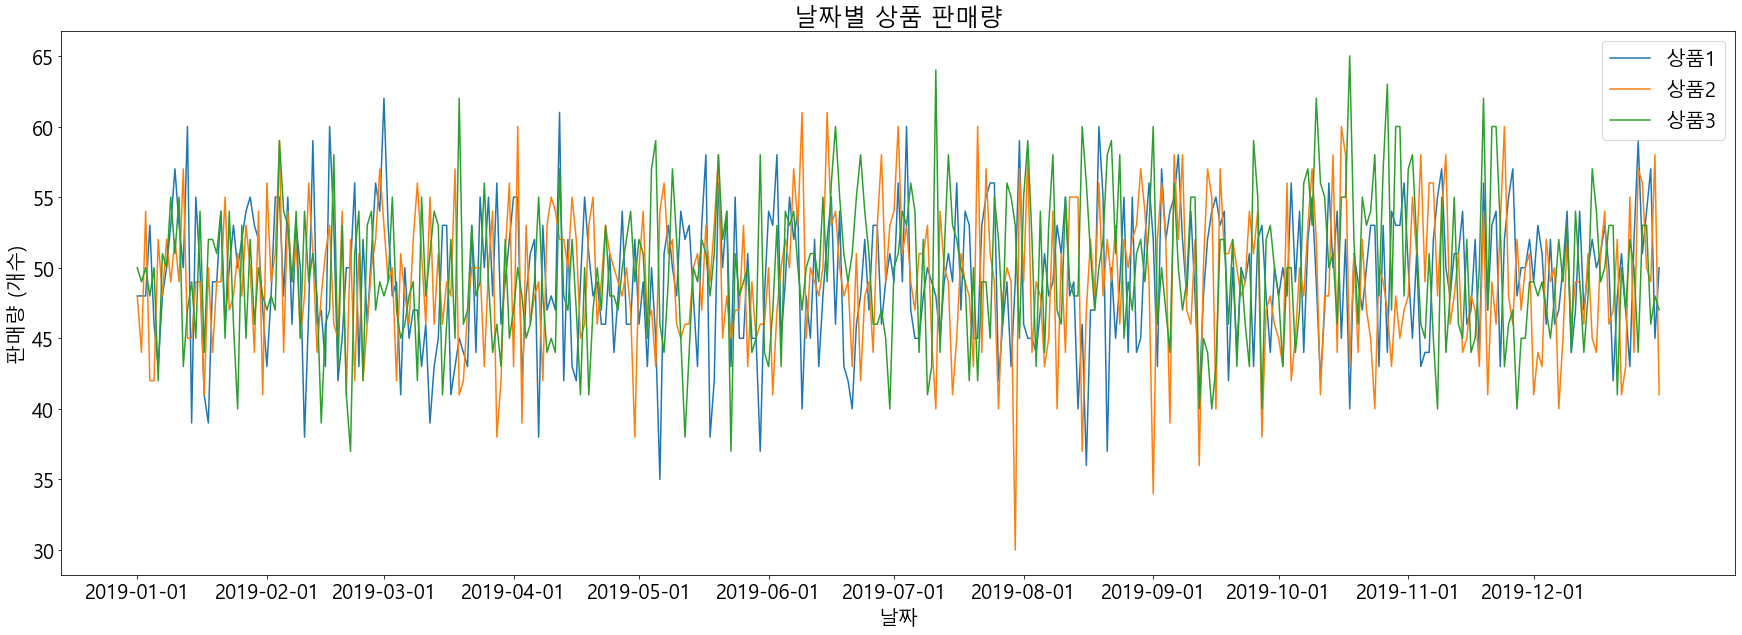

In [4]:
xtick_range = np.cumsum([0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30])     # 월별 일수 누적
df.plot(kind = 'line', x = '날짜', y = ['상품1', '상품2', '상품3'])

plt.title('날짜별 상품 판매량')
plt.xlabel('날짜')
plt.ylabel('판매량 (개수)')
plt.xticks(xtick_range, df['날짜'].loc[xtick_range]);

#### groupby를 이용한 그래프

In [5]:
df['날짜'].str.split('-', expand = True).head()

,0,1,2
0,2019,01,01
1,2019,01,02
2,2019,01,03
3,2019,01,04
4,2019,01,05


In [6]:
df['월'] = df['날짜'].str.split('-', expand = True).iloc[:, 1]
df.head()

,날짜,상품1,상품2,상품3,월
0,2019-01-01,48,48,50,01
1,2019-01-02,48,44,49,01
2,2019-01-03,48,54,50,01
3,2019-01-04,53,42,48,01
4,2019-01-05,46,42,50,01


In [7]:
df.groupby('월')[['상품1', '상품2', '상품3']].sum()

,상품1,상품2,상품3
월,,,
01,1545,1501,1521
02,1391,1388,1372
03,1488,1510,1514
04,1461,1483,1449
05,1485,1511,1530
06,1473,1508,1513
07,1548,1519,1558
08,1494,1545,1599
09,1506,1480,1464


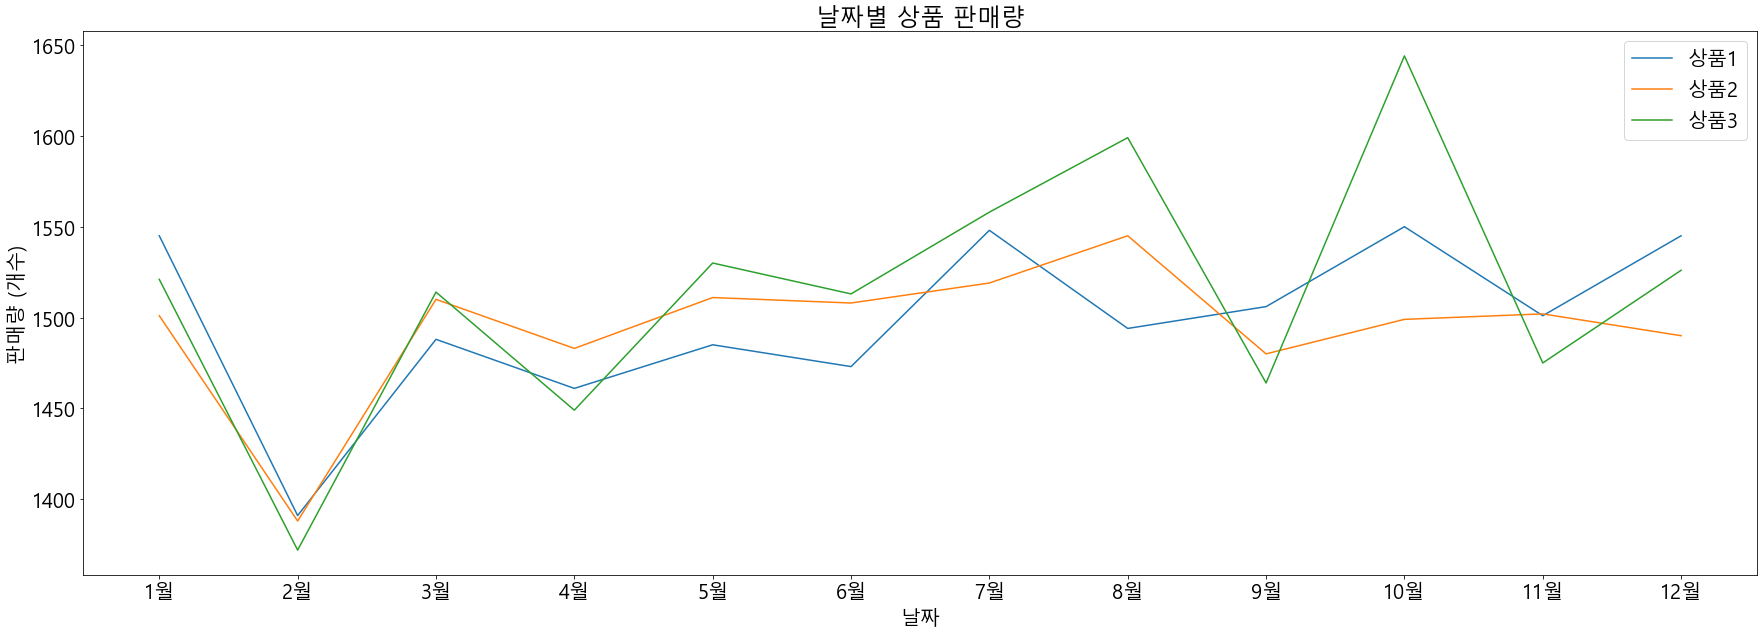

In [8]:
df.groupby('월')[['상품1', '상품2', '상품3']].sum().plot(kind = 'line')
plt.title('날짜별 상품 판매량')
plt.xlabel('날짜')
plt.ylabel('판매량 (개수)')
plt.xticks(range(12), [str(i + 1) + '월' for i in range(12)]);

# 3. 산점도

- pyplot.scatter
- x, y: x, y축에 들어갈 값(길이가 같아야 함)
- marker: 마커 종류
- markersize: 마커 크기
- color: 마커 색상
- label: 범례

In [9]:
df = pd.read_csv('데이터/판매실적통합본.csv', encoding = 'cp949')
df.head()

,년도(year),월(month),분기(4),일자(day),주차별 편중도,출하일,대리점,지역 구분,내수/수출 구분,제품군,수량
0,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,12
1,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,4
2,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,1
3,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 5,122
4,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,20


In [10]:
# 년도 - 분기를 더한 새로운 변수 생성

df['분기'] = df['년도(year)'].astype(str) + '-' + df['분기(4)'].astype(str)
df.head()

,년도(year),월(month),분기(4),일자(day),주차별 편중도,출하일,대리점,지역 구분,내수/수출 구분,제품군,수량,분기
0,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,12,2016-1분기
1,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,4,2016-1분기
2,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,1,2016-1분기
3,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 5,122,2016-1분기
4,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,20,2016-1분기


In [11]:
df.groupby(['분기', '대리점'])['수량'].sum()

분기        대리점   
2016-1분기  대리점 1     39934
          대리점 10     4525
          대리점 2     19787
          대리점 3     24723
          대리점 4      9010
                    ...  
2019-3분기  대리점 5     82314
          대리점 6      6252
          대리점 7     30405
          대리점 8     10096
          대리점 9     18856
Name: 수량, Length: 150, dtype: int64

In [12]:
df.groupby(['분기', '대리점'], as_index = False)['수량'].sum()

,분기,대리점,수량
0,2016-1분기,대리점 1,39934
1,2016-1분기,대리점 10,4525
2,2016-1분기,대리점 2,19787
3,2016-1분기,대리점 3,24723
4,2016-1분기,대리점 4,9010
...,...,...,...
145,2019-3분기,대리점 5,82314
146,2019-3분기,대리점 6,6252
147,2019-3분기,대리점 7,30405
148,2019-3분기,대리점 8,10096


- groupby를 하면 기준이 되는 열은 실행 결과에서 인덱스가 됨
- 이렇게 하지 않고 하나의 열로 빼내려면 as_index = False를 사용

In [13]:
grouped_df = df.groupby(['분기', '대리점'], as_index = False)['수량'].sum()
grouped_df

,분기,대리점,수량
0,2016-1분기,대리점 1,39934
1,2016-1분기,대리점 10,4525
2,2016-1분기,대리점 2,19787
3,2016-1분기,대리점 3,24723
4,2016-1분기,대리점 4,9010
...,...,...,...
145,2019-3분기,대리점 5,82314
146,2019-3분기,대리점 6,6252
147,2019-3분기,대리점 7,30405
148,2019-3분기,대리점 8,10096


#### pyplot을 이용한 그래프

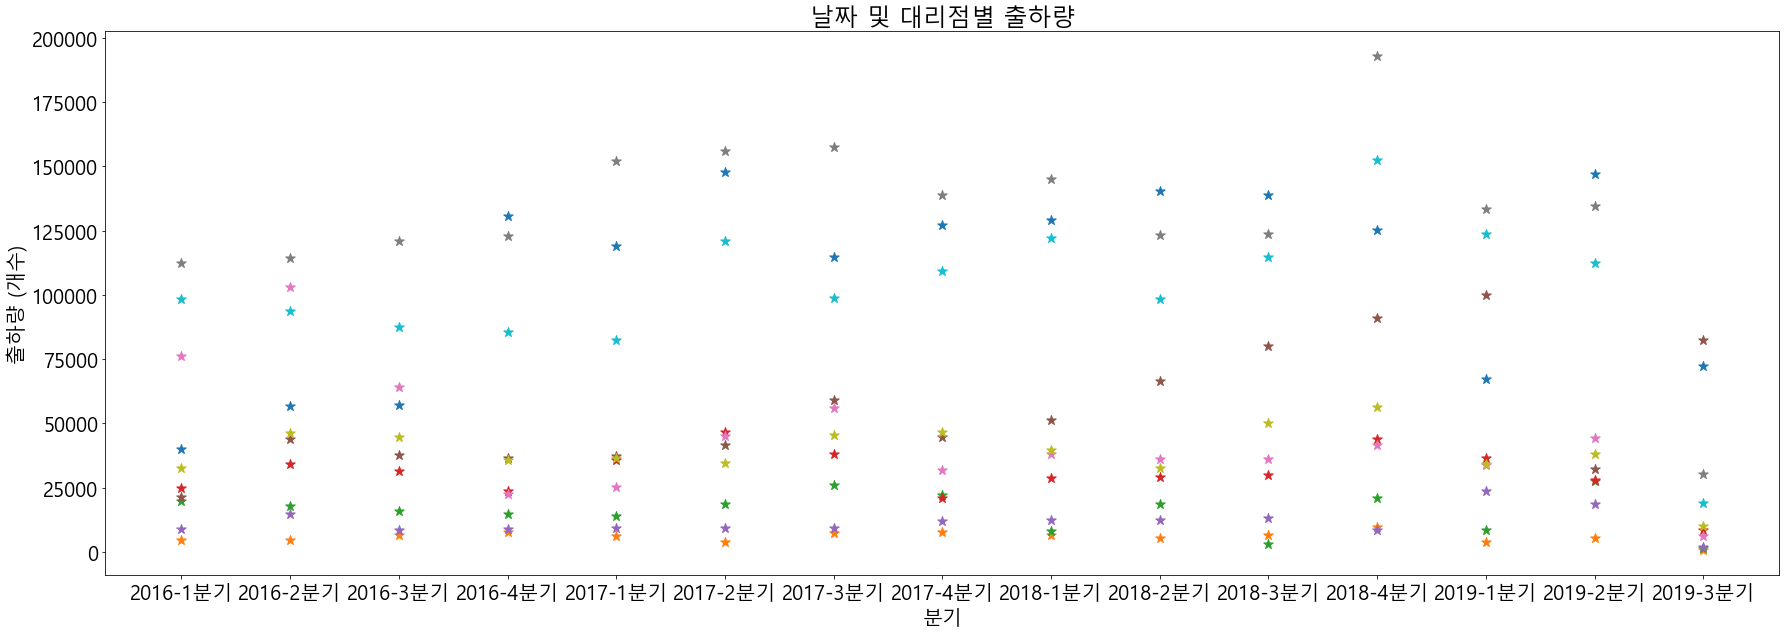

In [14]:
plt.title('날짜 및 대리점별 출하량')
plt.xlabel('분기')
plt.ylabel('출하량 (개수)')

xtick_range = range(len(grouped_df['분기'].unique()))
xtick_label = grouped_df['분기'].unique()
plt.xticks(xtick_range, xtick_label)

for agent in grouped_df['대리점'].unique():
    cond = grouped_df['대리점'] == agent
    plt.scatter(grouped_df.loc[cond]['분기'], grouped_df.loc[cond]['수량'], s = 100, marker = '*')

#### dataframe을 이용한 그래프

In [15]:
grouped_df.head()

,분기,대리점,수량
0,2016-1분기,대리점 1,39934
1,2016-1분기,대리점 10,4525
2,2016-1분기,대리점 2,19787
3,2016-1분기,대리점 3,24723
4,2016-1분기,대리점 4,9010


In [16]:
pivot_df = pd.pivot_table(data = grouped_df, values = '수량', index = '분기', columns = '대리점', aggfunc = 'sum')
pivot_df = pivot_df.add_suffix('_출하량')     # add_suffix: 칼럼 이름에 추가(대리점명이 칼럼명이 되기 때문에 _출하량을 덧붙임)
pivot_df

대리점,대리점 1_출하량,대리점 10_출하량,대리점 2_출하량,대리점 3_출하량,대리점 4_출하량,대리점 5_출하량,대리점 6_출하량,대리점 7_출하량,대리점 8_출하량,대리점 9_출하량
분기,,,,,,,,,,
2016-1분기,39934,4525,19787,24723,9010,21249,76005,112276,32743,98266
2016-2분기,56799,4519,17783,34247,14592,43818,103226,114176,46088,93726
2016-3분기,57184,6701,15878,31367,8300,37634,63977,120829,44548,87417
2016-4분기,130682,7704,14592,23857,8780,36622,22512,122822,35805,85516
2017-1분기,119085,6027,13951,35692,9375,37151,25148,152077,36627,82569
2017-2분기,147784,3780,18633,46604,9357,41749,45136,155935,34654,120782
2017-3분기,114819,7356,25919,37974,9397,59254,56074,157376,45479,98911
2017-4분기,126994,7853,22245,21024,11952,44728,31915,138685,46461,109366
2018-1분기,129271,6554,8176,28597,12280,51422,38133,144976,39479,121972


In [17]:
pivot_df['분기'] = list(range(len(pivot_df)))     # x축에 쓰기 위해 임의의 변수 생성
pivot_df['분기']

분기
2016-1분기     0
2016-2분기     1
2016-3분기     2
2016-4분기     3
2017-1분기     4
2017-2분기     5
2017-3분기     6
2017-4분기     7
2018-1분기     8
2018-2분기     9
2018-3분기    10
2018-4분기    11
2019-1분기    12
2019-2분기    13
2019-3분기    14
Name: 분기, dtype: int64

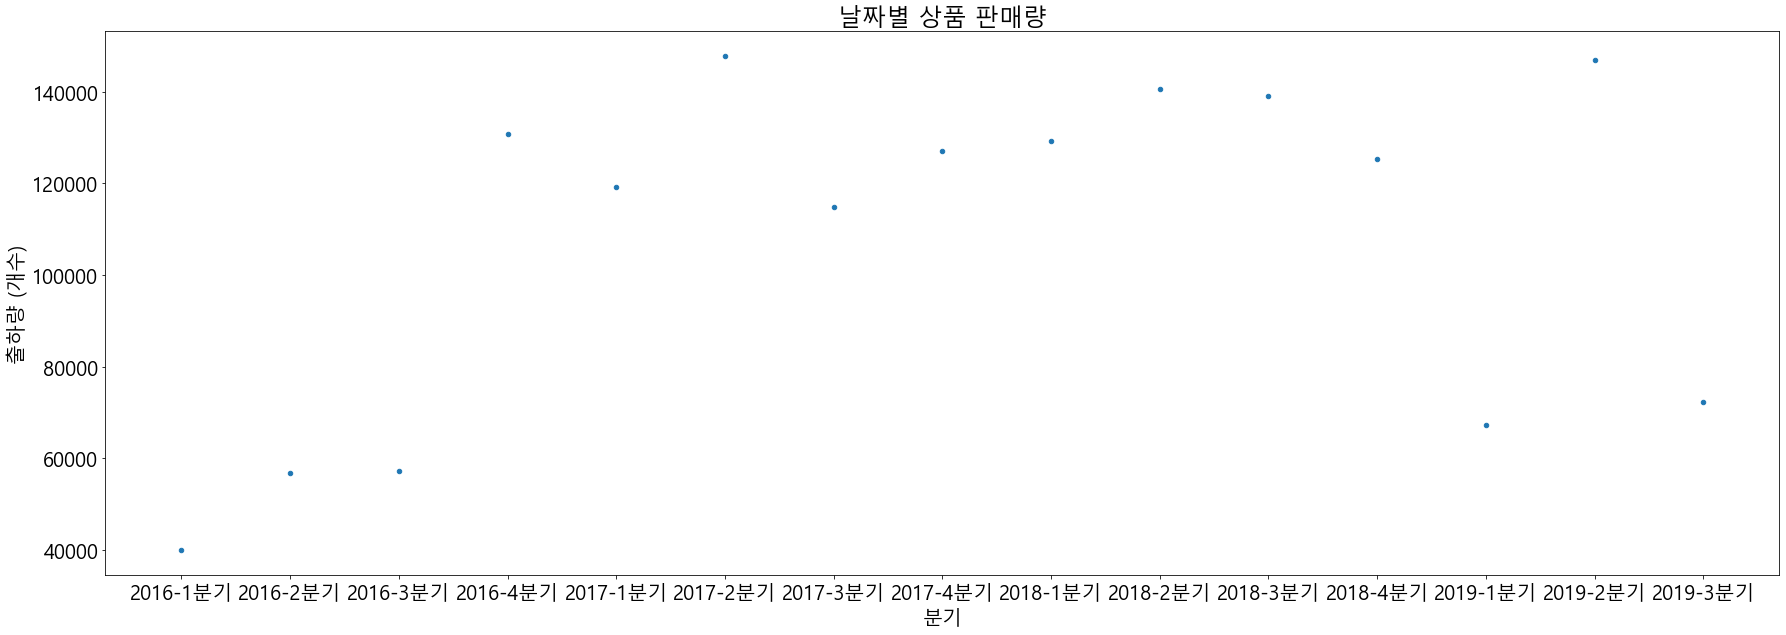

In [18]:
pivot_df.plot(kind = 'scatter', x = '분기', y = '대리점 1_출하량')
plt.title('날짜별 상품 판매량')
plt.xlabel('분기')
plt.ylabel('출하량 (개수)')

xtick_range = range(len(grouped_df['분기'].unique()))
xtick_label = grouped_df['분기'].unique()

plt.xticks(xtick_range, xtick_label);

# 4. 막대 차트

- pyplot.bar
- x: 막대의 위치
- height: 막대의 높이
- width: 막대의 너비
- align: 막대 정렬


#### 다중 막대 그래프

- 원본 데이터를 groupby 혹은 set_index를 사용하여 막대그래프 그리기 적합한 형태로 변환
- unstack 혹은 pivot_table을 사용하여 변환

In [19]:
df = pd.read_csv('데이터/판매실적통합본.csv', encoding = 'cp949')
df.head()

,년도(year),월(month),분기(4),일자(day),주차별 편중도,출하일,대리점,지역 구분,내수/수출 구분,제품군,수량
0,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,12
1,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,4
2,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,1
3,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 5,122
4,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,20


In [20]:
# 제품군별 수량합계 계산

grouped_df1 = df.groupby(['제품군'], as_index = False)['수량'].sum()
grouped_df1

,제품군,수량
0,제품 1,2690307
1,제품 2,4223384
2,제품 3,531946
3,제품 4,277193
4,제품 5,126323
5,제품 6,262774


<BarContainer object of 6 artists>

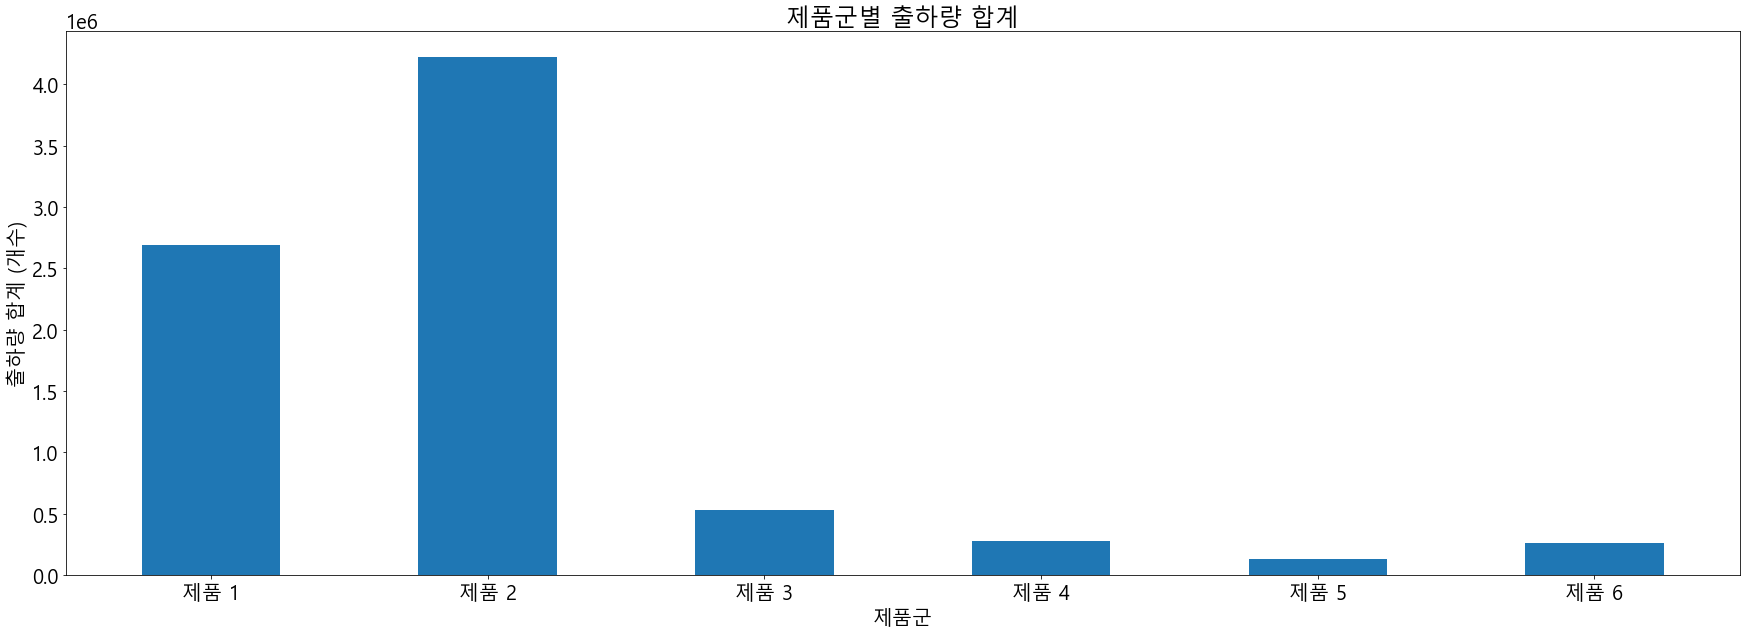

In [21]:
# 제품군별 출하량 합계 계산

plt.title('제품군별 출하량 합계')
plt.xlabel('제품군')
plt.ylabel('출하량 합계 (개수)')
plt.bar(grouped_df1['제품군'], grouped_df1['수량'], width = 0.5)

#### 다중 bar chart

In [25]:
grouped_df2 = df.groupby(['제품군', '년도(year)'], as_index = True)['수량'].sum()
grouped_df2

제품군   년도(year)
제품 1  2016         637130
      2017         763450
      2018         807846
      2019         481881
제품 2  2016        1029868
      2017        1215031
      2018        1307538
      2019         670947
제품 3  2016         134693
      2017         154208
      2018         157031
      2019          86014
제품 4  2016          56774
      2017          82124
      2018          83692
      2019          54603
제품 5  2016          30142
      2017          36363
      2018          39851
      2019          19967
제품 6  2016          41612
      2017          64722
      2018          85157
      2019          71283
Name: 수량, dtype: int64

In [26]:
grouped_df2.unstack()

년도(year),2016,2017,2018,2019
제품군,,,,
제품 1,637130,763450,807846,481881
제품 2,1029868,1215031,1307538,670947
제품 3,134693,154208,157031,86014
제품 4,56774,82124,83692,54603
제품 5,30142,36363,39851,19967
제품 6,41612,64722,85157,71283


<AxesSubplot:xlabel='제품군'>

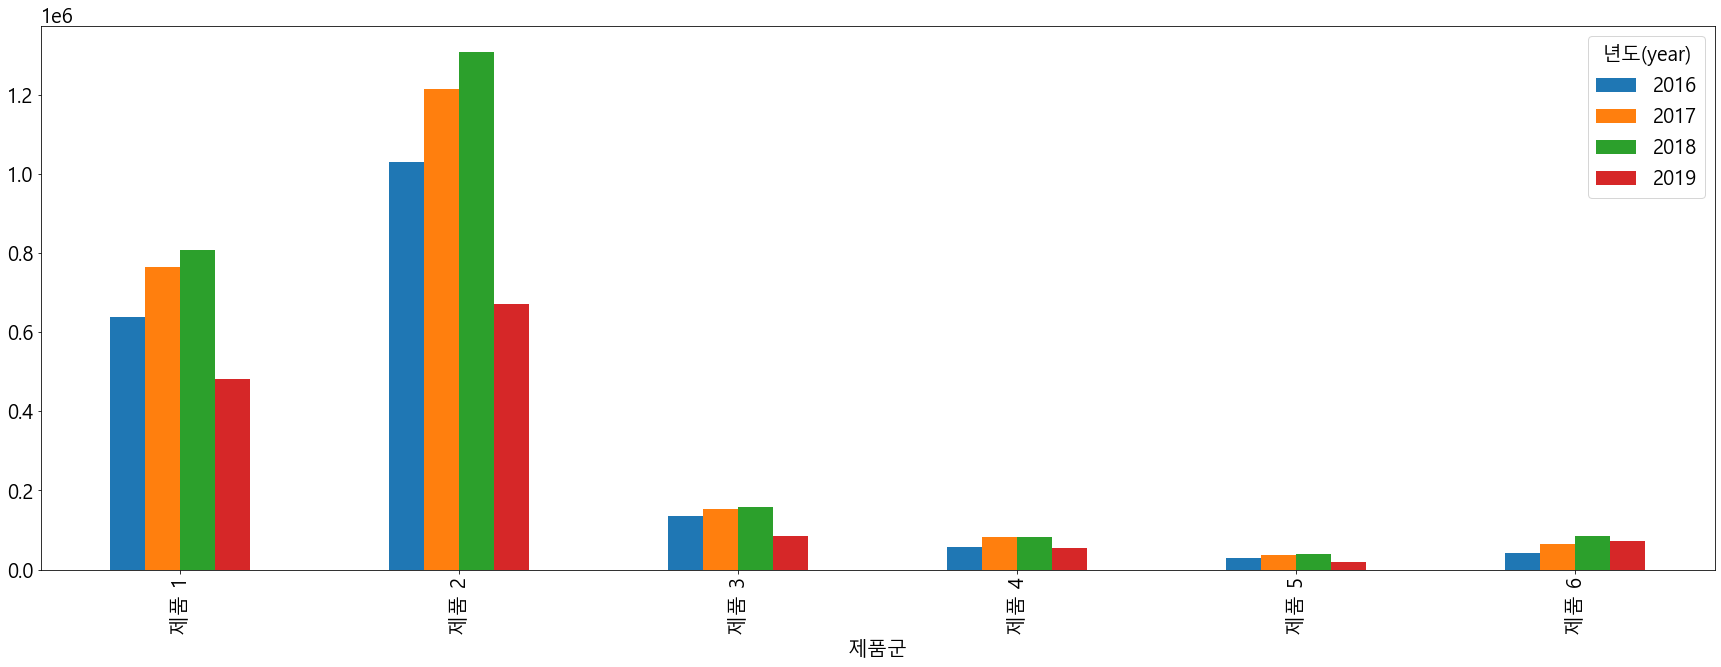

In [27]:
grouped_df2.unstack().plot(kind = 'bar')

# 5. 파이 차트

- pyplot.pie
- x: 각 파이의 크기
- labels: 각 파이에 부착되는 라벨
- labeldistance: 라벨 간 거리
- normalize: 비율을 나타낼 것인지 여부
- autopct: 위에 표시될 글자 형태
- colors: 배열로 설정해서 각 파트의 색상을 설정 가능

In [30]:
df = pd.read_csv('데이터/판매실적통합본.csv', encoding = 'cp949')
df.head()

,년도(year),월(month),분기(4),일자(day),주차별 편중도,출하일,대리점,지역 구분,내수/수출 구분,제품군,수량
0,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,12
1,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,4
2,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,1
3,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 5,122
4,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,20


In [31]:
# 제품군별 수량합계 계산

grouped_df = df.groupby(['제품군'], as_index = False)['수량'].sum()
grouped_df

,제품군,수량
0,제품 1,2690307
1,제품 2,4223384
2,제품 3,531946
3,제품 4,277193
4,제품 5,126323
5,제품 6,262774


In [35]:
grouped_df.sort_values(by = '수량', ascending = False)

,제품군,수량
1,제품 2,4223384
0,제품 1,2690307
2,제품 3,531946
3,제품 4,277193
5,제품 6,262774
4,제품 5,126323


In [33]:
grouped_df.sort_values(by = '수량')['수량']

4     126323
5     262774
3     277193
2     531946
0    2690307
1    4223384
Name: 수량, dtype: int64

In [37]:
# 수량기준 정렬했을 때 상위 2개를 제외한 나머지 제품군은 기타로 설정 후 상위2개+기타만 나타내기

other_row = pd.DataFrame({'제품군' : ['기타'], '수량': [grouped_df.sort_values(by = '수량')['수량'].iloc[:4].sum()]})
grouped_df = pd.concat([grouped_df, other_row], axis = 0, ignore_index = True)
grouped_df = grouped_df.sort_values(by = '수량', ascending = False).iloc[:3]
grouped_df

,제품군,수량
0,제품 2,4223384
1,제품 1,2690307
2,기타,1198236


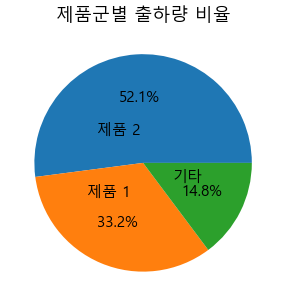

In [41]:
# 제품군별 출하량 합계 계산

plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (5, 5)

plt.title('제품군별 출하량 비율')
plt.pie(x = grouped_df['수량'], labels = grouped_df['제품군'], labeldistance = 0.3, autopct = '%1.1f%%');

# 6. 박스 플롯

- 하나의 변수에 대한 분포를 한 눈에 보여주는 그래프
- 최소값, Q1, Q2(중위수), Q3, 최대값, 이상치

#### matplotlib을 이용한 박스플롯 그리기
- pyplot.boxplot
- x: boxplot을 그리기 위한 데이터

#### dataframe.boxplot()을 이용한 박스플롯 그리기
- dataframe.boxplot
- column: box plot을 그릴 칼럼 목록

In [42]:
df = pd.read_csv('데이터/온라인_판매기록.csv', encoding = 'cp949')
df.head()

,쇼핑몰,제품,수량,판매금액,쇼핑몰 유형
0,쿠팡,제품_16,8,1134400,쿠팡
1,쿠팡,제품_57,8,439200,쿠팡
2,쿠팡,제품_25,4,495200,쿠팡
3,쿠팡,제품_18,4,578000,쿠팡
4,쿠팡,제품_90,2,75000,쿠팡


#### pyplot을 이용한 boxplot 그리기

In [43]:
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (15, 8)

In [45]:
df.groupby(['쇼핑몰 유형'])['판매금액']

In [44]:
x = df.groupby(['쇼핑몰 유형'])['판매금액'].apply(list)     # 쇼핑몰 유형에 따른 판매금액 목록을 리스트로 변환
x

쇼핑몰 유형
동물병원      [338400, 202600, 238800, 1088000, 135800, 8768...
온라인II     [400800, 586600, 291900, 654000, 684000, 40400...
온라인사이트    [10400, 631400, 516400, 318000, 300000, 306600...
유통대리점     [220200, 10100, 112500, 56000, 236600, 928900,...
전시회       [498000, 195300, 143500, 478200, 358400, 10731...
쿠팡        [1134400, 439200, 495200, 578000, 75000, 19550...
할인점       [39100, 670400, 1533000, 438400, 403200, 19250...
할인점II     [119100, 101300, 124200, 101400, 291900, 37350...
Name: 판매금액, dtype: object

In [49]:
x.index

Index(['동물병원', '온라인II', '온라인사이트', '유통대리점', '전시회', '쿠팡', '할인점', '할인점II'], dtype='object', name='쇼핑몰 유형')

In [50]:
x.values

array([list([338400, 202600, 238800, 1088000, 135800, 876800, 194400, 707400, 1051400, 1068800, 766500, 68600, 700200, 690400, 604800, 488600, 1162800, 707400, 159400, 81000, 903700, 83100, 243200, 14700, 380400, 1101000, 478200, 178000, 714000, 165000, 36800, 97200, 190200, 816900, 724000, 1251000, 243600, 774600, 153300, 318000, 286200, 557200, 426400, 475500, 90200, 1114400, 660600, 330000, 623000, 1327000, 357000, 102900, 1068800, 172200, 481000, 1393000, 178000, 657600, 432000, 909000, 875700, 631400, 751000, 508200, 260400, 44800, 124500, 375000, 26600, 62400, 214200, 200900, 434000, 121800, 234000, 1209600, 285600, 186200, 112500, 1032800, 578000, 380400, 19100, 1001700, 102500, 796200, 85500, 903700, 373100, 90900, 267000, 90700, 357300, 132900, 951000, 1201000, 142800, 312800, 769600, 265400, 645600, 27700, 92800, 57000, 543000, 46400, 290400, 389200, 628800, 778400, 528300, 274400, 621000, 79700, 42300, 310100, 289000, 488600, 122700, 293500, 633500, 720600, 144900, 669600, 9

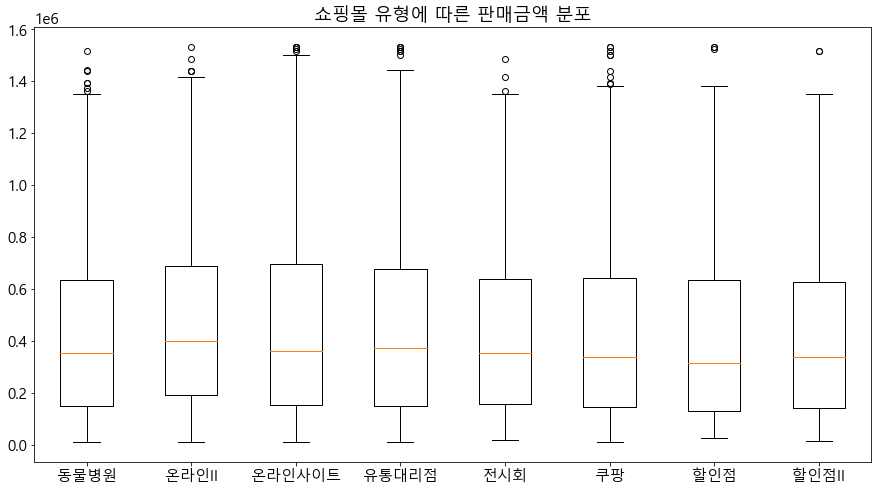

In [48]:
plt.title('쇼핑몰 유형에 따른 판매금액 분포')
plt.boxplot(x.values) 
plt.xticks(np.arange(1, len(x) + 1), x.index);

#### dataframe을 이용한 boxplot 그리기

In [51]:
df = pd.DataFrame({'실험1': np.random.normal(10, 2, size = 100),
                   '실험2': np.random.normal(8, 3, size = 100),
                   '실험3': np.random.normal(9, 4, size = 100)})
df.head()

,실험1,실험2,실험3
0,12.015156,8.134132,10.629939
1,12.749018,5.688146,14.417213
2,11.702709,8.659864,7.258034
3,8.210456,10.824746,19.457408
4,10.586916,9.077114,4.611516


<AxesSubplot:>

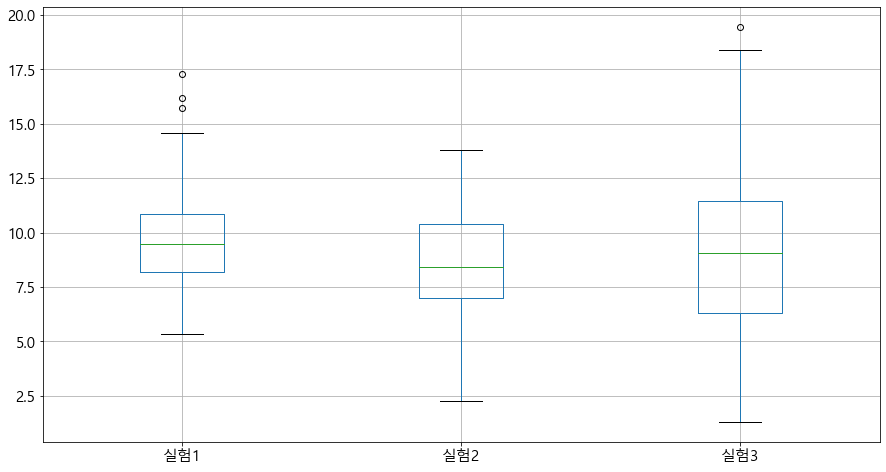

In [53]:
df.boxplot(column = ['실험1', '실험2', '실험3'])